Example

Importing Relevent Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/content/drive/MyDrive/data/CART.xlsx")

In [3]:
data

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


Data Encoding

In [4]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [5]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [6]:
data["age_n"] = le_age.fit_transform(data["age"])
data["income_n"] = le_income.fit_transform(data["income"])
data["student_n"] = le_student.fit_transform(data["student"])
data["credit_rating_n"] = le_credit_rating.fit_transform(data["credit_rating"])
data["buys_computer_n"] = le_buys_computer.fit_transform(data["buys_computer"])

In [7]:
data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [8]:
data_new = data.drop(["age", "income", "student", "credit_rating", "buys_computer"], axis="columns")
data_new

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1
5,6,1,1,1,0,0
6,7,0,1,1,0,1
7,8,2,2,0,1,0
8,9,2,1,1,1,1
9,10,1,2,1,1,1


In [9]:
feature_cols = ["age_n", "income_n", "student_n", "credit_rating_n"]
x = data_new.drop(["buys_computer_n", "RID"], axis="columns") # input
y = data_new["buys_computer_n"] # target

In [10]:
x

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [11]:
y.head()

,buys_computer_n
0,0
1,0
2,1
3,1
4,1


Building the Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x, y)
dt

DecisionTreeClassifier()

!pip install graphviz

!pip install pydotplus

Visualizing Decision Tree

In [29]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# import pydotplus

In [14]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO # This line is causing the error
from io import StringIO # Import StringIO from the 'io' module instead
from IPython.display import Image
import pydotplus

In [15]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=["0", "1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("/content/drive/MyDrive/data/Decision_Tree.png")

True

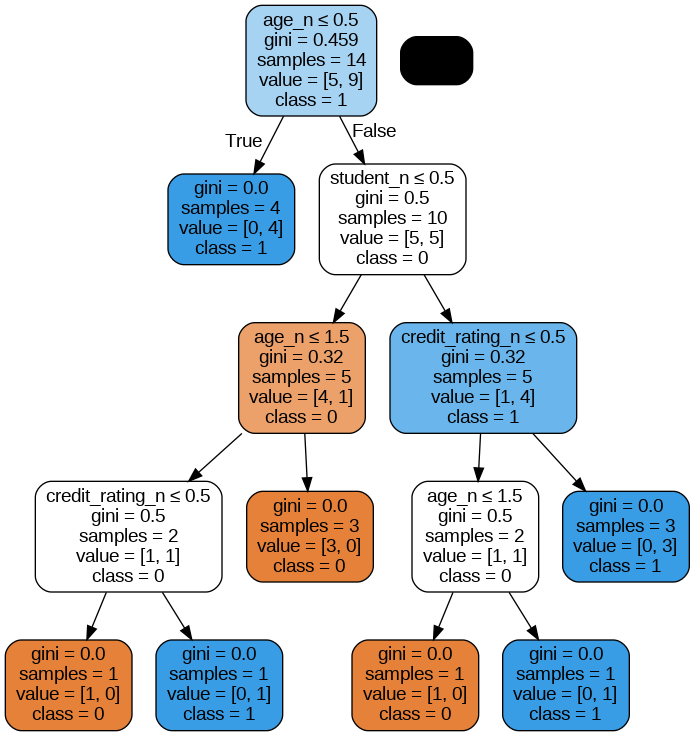

In [16]:
Image(graph.create_png())

Spiliting data set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Building Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)
dt

DecisionTreeClassifier()

In [21]:
DecisionTreeClassifier?

Evaluating Model

In [22]:
from sklearn import metrics

In [23]:
y_pred = clf.predict(x_test)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


Visualizing Decision Tree

In [27]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# import pydotplus

In [28]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO # This line is causing the error
from io import StringIO # Import StringIO from the 'io' module instead
from IPython.display import Image
import pydotplus

In [30]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=["0", "1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("/content/drive/MyDrive/data/buys_computer.png")

True

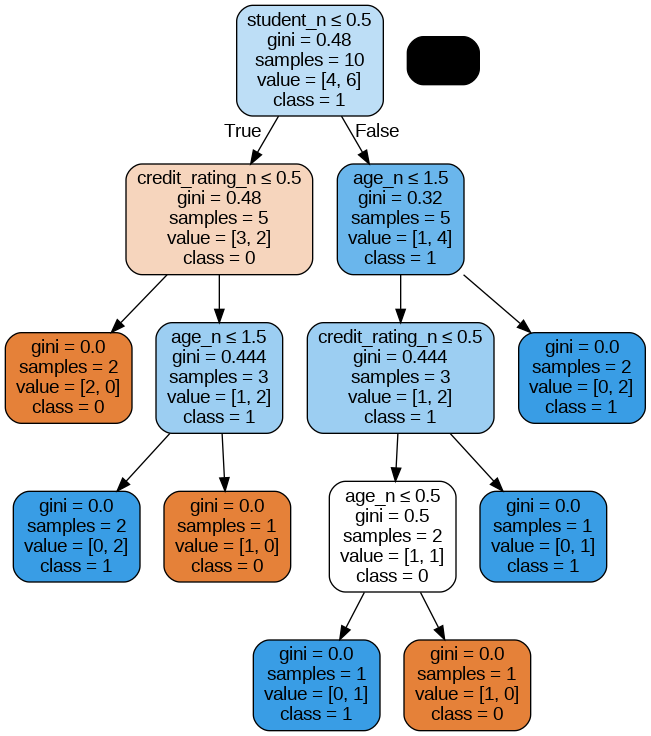

In [31]:
Image(graph.create_png())